In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
sex = pd.get_dummies(data['Sex'],drop_first=True)   #gender is converted into numerical values
chestpaintype = pd.get_dummies(data['ChestPainType'],drop_first=True)
restingecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
stslope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [4]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True) 

In [5]:
data = pd.concat([data,sex,chestpaintype,restingecg,ExerciseAngina,stslope],axis=1)

In [6]:
column_names = ['Age','M','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','Normal','ST','MaxHR','Y','Oldpeak','Flat','Up','HeartDisease']
data = data.reindex(columns=column_names)

In [7]:
X = data.drop(['HeartDisease'], axis = 1) #define the features as X

In [8]:
y = data['HeartDisease'] #define the label as Y

In [9]:
from sklearn.model_selection import train_test_split  #import the data selection libr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

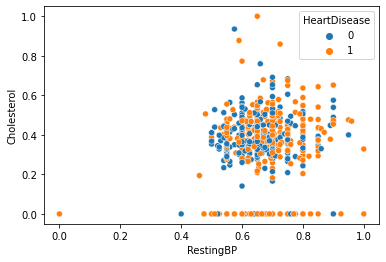

In [10]:
#Normalization
import seaborn as sns
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['RestingBP'], y =X_train_scaled ['Cholesterol'],hue = 'HeartDisease', data = data) #viasualize the particular faetures after

In [11]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [12]:
from sklearn.neighbors import KNeighborsClassifier #import the kNN algorithm

In [13]:
error_rate = []  #finding the optimum vale of k

for i in range (1,73):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_predict = knn.predict(X_test_scaled)
    error_rate.append(np.mean(y_predict != y_test))

Text(0, 0.5, 'Error Rate')

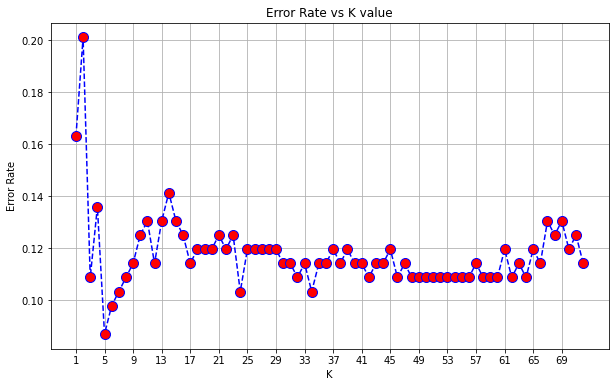

In [23]:
plt.figure(figsize=(10,6))  #visualize the k vale with the respect to error rate
plt.plot(range(1,73),error_rate,color='blue',linestyle='dashed', marker='o',
        markerfacecolor='red',markersize=10)
plt.xticks(range(1, 73,4))
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.grid()
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=5) #set the paramenter of the kNN

In [25]:
knn.fit(X_train_scaled, y_train) #training the model

KNeighborsClassifier()

In [26]:
predictions = knn.predict(X_test_scaled) #test the model performance 

In [27]:
from sklearn.metrics import classification_report,confusion_matrix #import the performanc

In [28]:
print(classification_report(y_test,predictions))  #print the performance of the algo

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        73
           1       0.96      0.89      0.93       111

    accuracy                           0.91       184
   macro avg       0.91      0.92      0.91       184
weighted avg       0.92      0.91      0.91       184



In [29]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

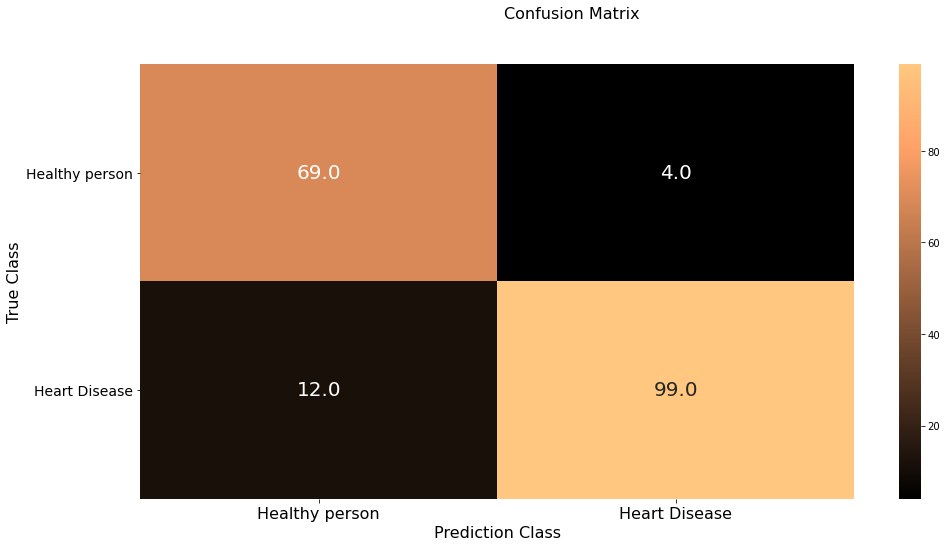

In [30]:
fig=plt.figure(figsize=(16,8))
xticklabel=['Healthy person','Heart Disease']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 20})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=16)
plt.xlabel("Prediction Class",fontsize=16)
plt.ylabel("True Class",fontsize=16)

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,knn.predict(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,knn.predict_proba(X_test_scaled)[:,1])

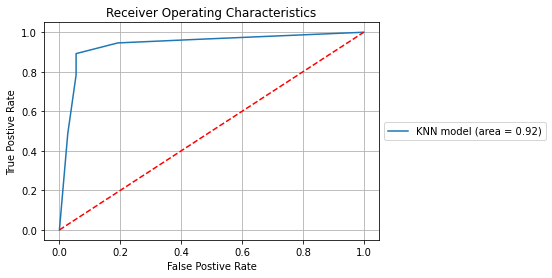

In [32]:
plt.figure()
plt.plot(fpr,tpr,label='KNN model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()